## Prediction Using Decision Tree

### Objective:
    1.Predict the Species of Iris Dataset using Decision Tree Algorithm
    2.Create the Decision Tree classifier and visualize it graphically.
    
### Author : Shubham Dutt
#### Data Science and Business Analytics Intern June 2021 
#### The Sparks Foundation

In [1]:
# Import the relevent libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Given data set i.e. Iris dataset

df=pd.read_csv('C:\Projects\Data Analyst\The Sparks Foundation Internship\Task 2- Prediction using Decision Tree\Iris.csv')

In [3]:
# Show top 5 rows using 'head()' funtion

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Number of records in Given Dataset

df.shape

(150, 6)

In [5]:
# Check null values in the dataset

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Check unique values in our target festure i.e. 'Species'

df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
# Count the no. of values of each class in our target feature

df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
# Check data types of all the features 

df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
# Drop the irrelevent feature i.e. 'Id'

df=df.drop(['Id'],axis=1)

In [10]:
# Again show the top 5 rows without 'Id'

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# We use "describe()" for descriptive statistic function

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# we use "info()" for information about our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory Data Analysis

<AxesSubplot:>

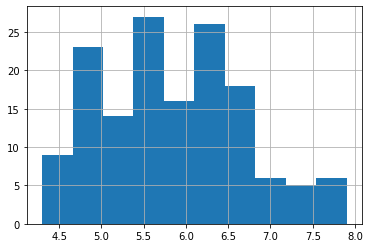

In [13]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

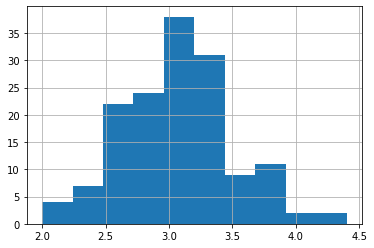

In [14]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

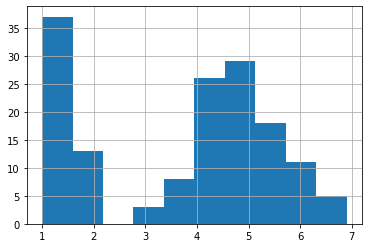

In [15]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

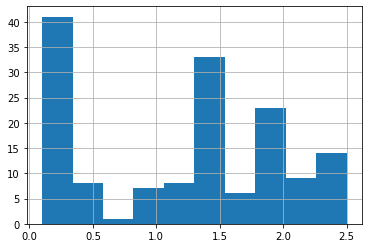

In [16]:
df['PetalWidthCm'].hist()

In [17]:
# Scatter plot
colors=['red','orange','blue']
species=['Iris-setosa','Iris-virginica','Iris-versicolor']

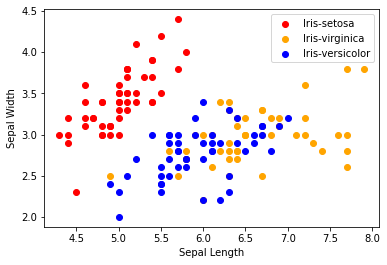

In [18]:
for i in range(3):
    x= df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

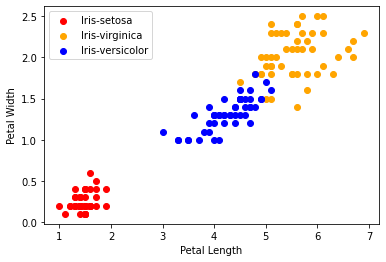

In [19]:
for i in range(3):
    x= df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

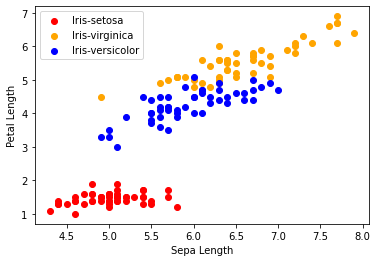

In [20]:
for i in range(3):
    x= df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepa Length')
plt.ylabel('Petal Length')
plt.legend()

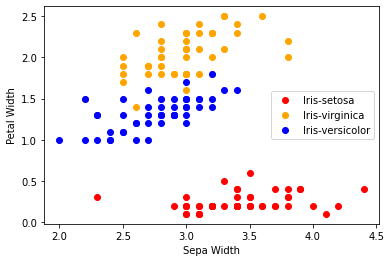

In [21]:
for i in range(3):
    x= df[df['Species']== species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('Sepa Width')
plt.ylabel('Petal Width')
plt.legend()

In [22]:
# find coefficient correlation between the features

df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

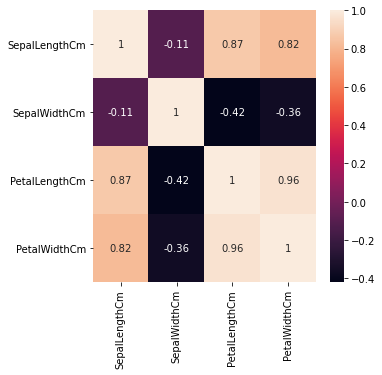

In [23]:
# find coefficient correlation between the features with the help of 'heatmap'

corr=df.corr()
top_features=corr.index
plt.figure(figsize=(5,5))
sns.heatmap(df[top_features].corr(),annot=True)

<AxesSubplot:>

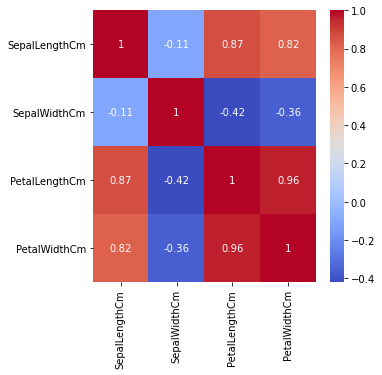

In [24]:
corr=df.corr()
top_features=corr.index
plt.figure(figsize=(5,5))
sns.heatmap(df[top_features].corr(),annot=True,cmap='coolwarm')

### Label Encoding

In [25]:
# Use Label Encoding for categorical feature into numeric form for ML model

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [26]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
print(df['Species'].value_counts())

2    50
1    50
0    50
Name: Species, dtype: int64


### Preperaing the data

In [28]:
# Seperating the Independent and Dependent feature and store it into X and y respectively  

X=df.drop(['Species'],axis=1)
y=df['Species']

### Splitting the data into Train and Test dataset

In [29]:
# Import train_test_split library 

from sklearn.model_selection import train_test_split

In [30]:
# test_size = 0.33 means 33% of the data will be used for testing and 67% of the data will be used for the training.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)

### Check Model Using Decision Tree Algorithem

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf = DecisionTreeClassifier()

In [33]:
clf = clf.fit(X_train,y_train)

In [34]:
y_pred = clf.predict(X_test)

In [35]:
print("Accuracy:",clf.score(X_test,y_test))

Accuracy: 0.9428571428571428


In [36]:
# Comparing Actual vs Predicted
df_Decision = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Decision

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
...,...,...
38,0,0
5,0,0
53,1,1
143,2,2


### Check Model using KNN Algorithem

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [38]:
knn = knn.fit(X_train,y_train)

In [39]:
y_pred = knn.predict(X_test)

In [40]:
print("Accuracy:",knn.score(X_test,y_test))

Accuracy: 0.9142857142857143


In [41]:
# Comparing Actual vs Predicted
df_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_KNN

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
...,...,...
38,0,0
5,0,0
53,1,1
143,2,2


### Check Model Using Logistic Regression Algorithm

In [42]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor= regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\SHUBHAM DUTT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
print("Accuracy:",regressor.score(X_test,y_test))

Accuracy: 0.9047619047619048


In [44]:
y_test

114    2
62     1
33     0
107    2
7      0
      ..
38     0
5      0
53     1
143    2
105    2
Name: Species, Length: 105, dtype: int32

In [45]:
# Comparing Actual vs Predicted
df_Log = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_Log

,Actual,Predicted
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
...,...,...
38,0,0
5,0,0
53,1,1
143,2,2


In [50]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

### Visualize the Decision Tree


In [46]:
# Install required libraries

# Export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

!pip install pydotplus
!pip install graphviz

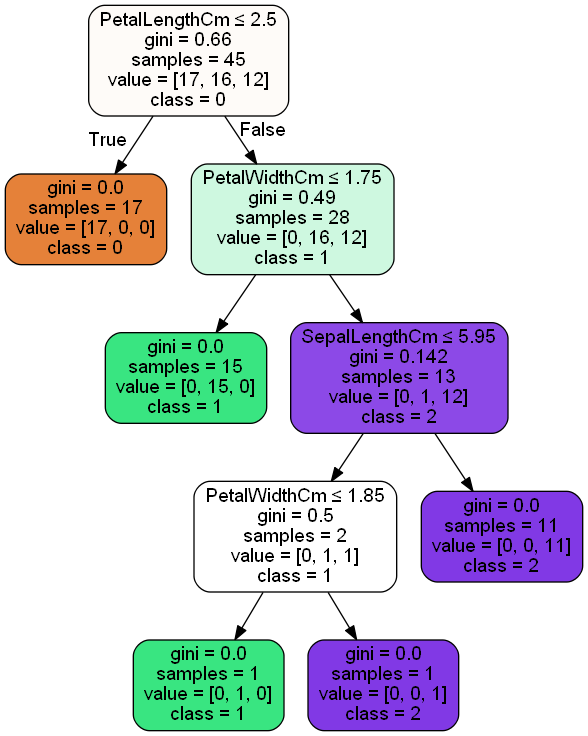

In [54]:
# Import necessary libraries for visualise the Decision Tree graph

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                special_characters=True,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())